In [6]:
import pandas as pd
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = Table.read('/media/biswajit/drive/RESSPECT_PERFECT_LIGHTCURVE.csv' )

In [8]:
df

SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR
float64,float64,str1,float64,float64,float64
3228.0,53000.0,u,-0.09708462,0.14184059999999998,-0.6844628
3228.0,53000.0,g,0.06404406,0.1420662,0.45080435
3228.0,53000.0,r,0.19354166,0.14252123,1.3579848
3228.0,53000.0,i,0.35907343,0.14310078,2.5092347000000004
3228.0,53000.0,z,-0.065577395,0.14184059999999998,-0.4623316
3228.0,53000.0,Y,0.1893592,0.14250655,1.3287753999999998
3228.0,53002.0,u,0.106876865,0.14221686,0.75150627
3228.0,53002.0,g,0.050195143,0.14201744,0.3534435
3228.0,53002.0,r,-0.012204765,0.14184059999999998,-0.08604564


In [9]:
meta_df = Table.read('/media/biswajit/drive/RESSPECT_PERFECT_HEAD.csv')
meta_df

SNID,redshift,type,code,sample
float64,float64,str10,float64,str5
6612.0,0.41613463,II_V19,42.0,train
7860.0,0.23487686,II-NMF,42.0,train
3421.0,0.14118282,II-NMF,42.0,train
3368.0,0.26212534,II-NMF,42.0,train
3200.0,0.47726378,II_V19,42.0,train
2478.0,0.5132554,II_V19,42.0,train
1640.0,0.20038009,IIn,42.0,train
6509.0,0.2553885,II_V19,42.0,train
2002.0,0.2602583,II_V19,42.0,train


In [10]:
objects_ids = meta_df['SNID']

In [11]:
filters = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

In [12]:
#preprocessing 


In [13]:
from LightCurve import LightCurve

In [14]:
num_of_elements=51
final_array = np.zeros((len(objects_ids),num_of_elements))
    
for i,object_id in enumerate(objects_ids):
    #print(i)
    ob_list = []
    object_mask = df['SNID']==object_id
    object_df = df[object_mask]

    
    #for band in filters.keys():

    band_mask = object_df['FLT'] == 'r'
    band_df = object_df[band_mask]

    index_of_maximum = np.argmax(band_df['FLUXCAL'])
    date_of_maximum = band_df['MJD'][index_of_maximum]
    #print(date_of_maximum)
    start_date = date_of_maximum-50
    end_date = date_of_maximum+50 
    
    start_index = band_df['MJD']>= start_date
    end_index = band_df['MJD'] <= end_date
    
    df_within_date = band_df[start_index*end_index]
    #print(df_within_date['MJD'])
    max_loc = np.argmax(df_within_date['FLUXCAL'])
    
    #print(max_loc)
    flux_data = np.zeros((num_of_elements))
    
    flux_data[25-max_loc:25-max_loc+len(df_within_date['MJD'])] = df_within_date['FLUXCAL']
   
            
    final_array[i] = flux_data
        
        

[-1.2700565e-01 -4.1222163e-02 -2.6677550e-01 -2.8422663e-01
  5.0330237e-03 -2.3546322e-01 -6.1314170e-02  3.0467357e-03
 -1.3302564e-02 -1.8168595e-01 -1.5305400e-01 -9.8151304e-02
  3.1389800e-02 -7.2185725e-02 -1.3800535e-02 -8.0443315e-02
 -4.6392970e-02 -2.4372550e-01  7.6913637e-01  1.1614035e+01
  2.8411224e+01  4.2256620e+01  4.9807930e+01  5.1972100e+01
  5.2847800e+01  5.2895046e+01  5.2028580e+01  5.1539700e+01
  5.0195530e+01  4.9024605e+01  4.7762474e+01  4.6247543e+01
  4.3121944e+01  4.1163290e+01  3.9540844e+01  3.7347450e+01
  3.4574734e+01  3.2987247e+01  3.1394903e+01  2.9272131e+01
  2.8683468e+01  2.7549744e+01  2.6490590e+01  2.5732992e+01
  2.5138737e+01  2.4656640e+01  2.4345085e+01  2.3907917e+01
  2.3574389e+01  2.3665420e+01  2.3078352e+01]


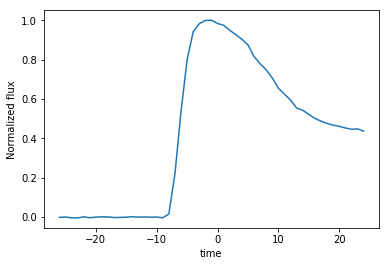

In [15]:
x = np.arange(51)-26
plt.xlabel("time")
plt.ylabel("Normalized flux")
plt.plot(x,final_array[1]/np.amax(final_array[1]))
print(final_array[1])

In [16]:
print(len(objects_ids))

4000


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=10)

In [19]:
pca.fit(final_array)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_ratio_

array([9.36097124e-01, 3.93375015e-02, 1.01786508e-02, 8.35131784e-03,
       1.42428617e-03, 1.31570286e-03, 9.53183524e-04, 5.37098417e-04,
       4.59333506e-04, 3.15096997e-04])

In [21]:
pca.singular_values_

array([55966.84865582, 11472.91522296,  5836.0029851 ,  5286.2525111 ,
        2183.07686474,  2098.21171314,  1785.9062677 ,  1340.59419451,
        1239.75098277,  1026.81577017])

In [24]:
PCs = pca.components_

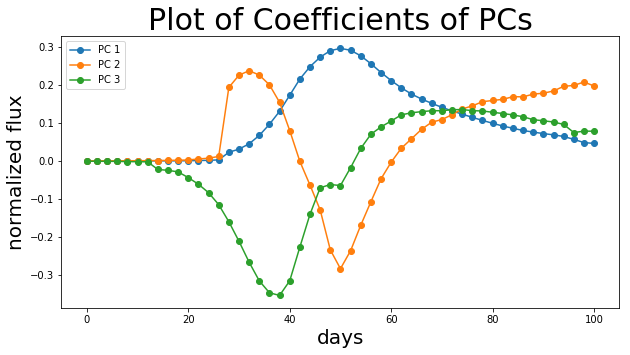

In [25]:
fig = plt.figure(figsize=(10,5))
for i in range(3):
    PC = PCs[i]
    x = np.arange(0,102,2)
    plt.plot(x,PC,marker='o',label = "PC "+str(i+1))

plt.xlabel("days", fontsize = 20)
plt.ylabel("normalized flux", fontsize=20)
    
plt.legend()
plt.title("Plot of Coefficients of PCs",fontsize=30)
fig.savefig("Plot of PCs")
plt.show()

In [26]:
np.save("PCs",pca.components_)